In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Grades.csv')
print(df)
skew=df['Attendance'].skew()

   StudentID     Name    Age  MathScore  EnglishScore  ScienceScore  \
0          1    Alice   20.0       85.0          90.0          88.0   
1          2      Bob   21.0       95.0          88.0          90.0   
2          3  Charlie   19.0       40.0          50.0           NaN   
3          4    David   23.0       78.0           NaN          82.0   
4          5      Eve  200.0       88.0          92.0          89.0   
5          6    Frank    NaN       72.0          85.0          70.0   
6          7    Grace   20.0        NaN          78.0          76.0   
7          8   Hannah   21.0       85.0          90.0          95.0   
8          9      Ivy   22.0       91.0          80.0          93.0   
9         10     Jack   20.0       77.0          75.0          65.0   

   Attendance  
0        95.0  
1         NaN  
2        80.0  
3        85.0  
4        95.0  
5        60.0  
6        92.0  
7        96.0  
8        97.0  
9        58.0  


In [4]:
print('Skewness of the data:',skew)

Skewness of the data: -1.1362158080213764


In [5]:
df.describe()

,StudentID,Age,MathScore,EnglishScore,ScienceScore,Attendance
count,10.00000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.50000,40.666667,79.000000,80.888889,83.111111,84.222222
std,3.02765,59.762028,16.309506,13.013881,10.588253,15.360483
min,1.00000,19.000000,40.000000,50.000000,65.000000,58.000000
25%,3.25000,20.000000,77.000000,78.000000,76.000000,80.000000
50%,5.50000,21.000000,85.000000,85.000000,88.000000,92.000000
75%,7.75000,22.000000,88.000000,90.000000,90.000000,95.000000
max,10.00000,200.000000,95.000000,92.000000,95.000000,97.000000


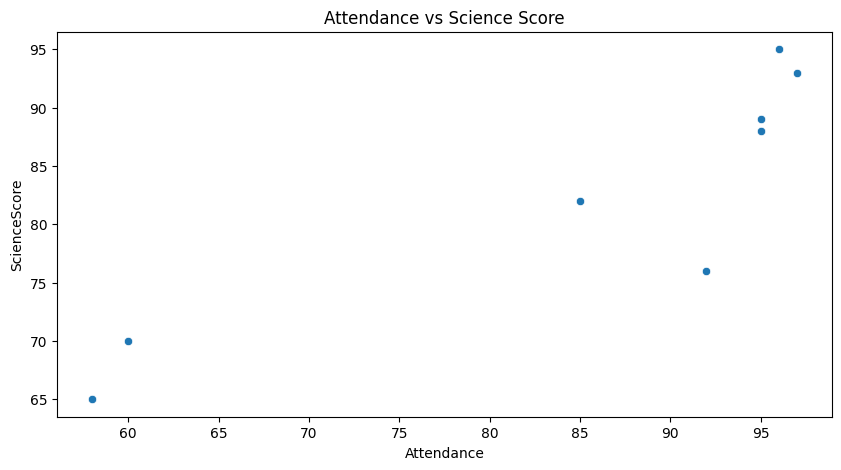

In [14]:
#CORRELATION BETWEEN MATH SCORE AND ENGLISH SCORE
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='Attendance',y='ScienceScore')
plt.title('Attendance vs Science Score')
plt.show()

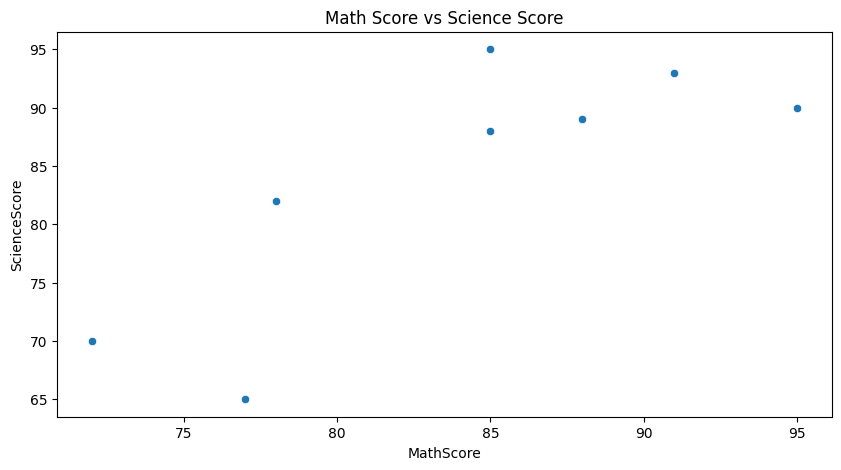

In [3]:
#CORRELATION BETWEEN MATH SCORE AND ENGLISH SCORE
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='MathScore',y='ScienceScore')
plt.title('Math Score vs Science Score')
plt.show()

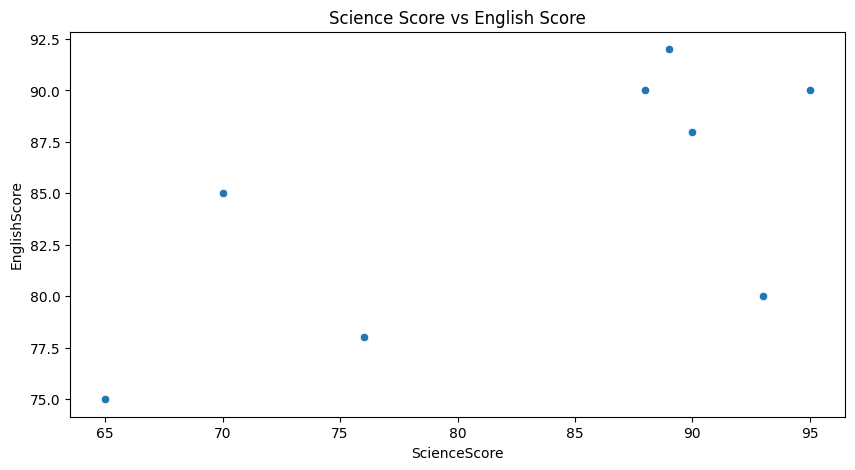

In [13]:
#CORRELATION BETWEEN MATH SCORE AND ENGLISH SCORE
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='ScienceScore',y='EnglishScore')
plt.title('Science Score vs English Score')
plt.show()

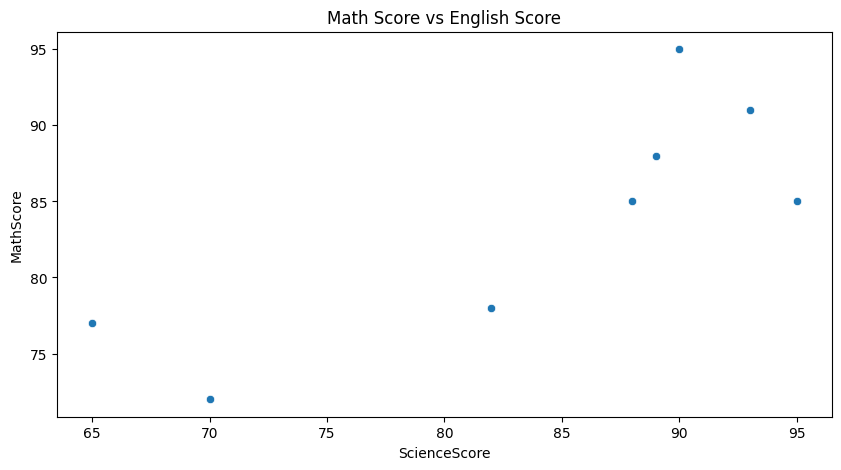

In [12]:
#CORRELATION BETWEEN MATH SCORE AND ENGLISH SCORE
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='ScienceScore',y='MathScore')
plt.title('Science Score vs Math Score')
plt.show()

In [6]:
median_math = df['MathScore'].median()
median_english=df['EnglishScore'].median()
median_science= df['ScienceScore'].median()

print("Median Math Score: ", median_math)
print("Median English Score: ", median_english)
print("Median Science Score: ", median_science)

skew_math = df['MathScore'].skew()
skew_english = df['EnglishScore'].skew()
skew_science = df['ScienceScore'].skew()

print("Skewness of Math Score: ", skew_math)
print("Skewness of English Score: ", skew_english)
print("Skewness of Science Score: ", skew_science)



Median Math Score:  85.0
Median English Score:  85.0
Median Science Score:  88.0
Skewness of Math Score:  -1.9517637833038681
Skewness of English Score:  -1.924109796042572
Skewness of Science Score:  -0.7121397089533297


In [5]:
#DETECT OUTLIERS BASED ON IQR
Q1 = df['EnglishScore'].quantile(0.25)
Q3 = df['EnglishScore'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds for english score
lower_bound_english = Q1 - 1.5 * IQR
upper_bound_english = Q3 + 1.5 * IQR

Q1 = df['MathScore'].quantile(0.25)
Q3 = df['MathScore'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds for Math score
lower_bound_math = Q1 - 1.5 * IQR
upper_bound_math = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['EnglishScore'] < lower_bound_english) | (df['EnglishScore'] > upper_bound_english) | (df['MathScore'] < lower_bound_math) | (df['MathScore'] > upper_bound_math)]

print(f"\nOutliers detected in Age column (using IQR):\n{outliers}")



Outliers detected in Age column (using IQR):
   StudentID     Name   Age  MathScore  EnglishScore  ScienceScore  Attendance
2          3  Charlie  19.0       40.0          50.0           NaN        80.0


In [6]:
df_no_outliers = df[(df['EnglishScore'] >= lower_bound_english) & (df['EnglishScore'] <= upper_bound_english)]
print(df_no_outliers)
df_no_outliers.describe()
skew=df_no_outliers['Attendance'].skew()
print('Skewness of the data:',skew)

   StudentID    Name    Age  MathScore  EnglishScore  ScienceScore  Attendance
0          1   Alice   20.0       85.0          90.0          88.0        95.0
1          2     Bob   21.0       95.0          88.0          90.0         NaN
4          5     Eve  200.0       88.0          92.0          89.0        95.0
5          6   Frank    NaN       72.0          85.0          70.0        60.0
6          7   Grace   20.0        NaN          78.0          76.0        92.0
7          8  Hannah   21.0       85.0          90.0          95.0        96.0
8          9     Ivy   22.0       91.0          80.0          93.0        97.0
9         10    Jack   20.0       77.0          75.0          65.0        58.0
Skewness of the data: -1.2028283053059834


In [7]:
#MEDIANS AND SKEWNESS AFTER REMOVING OUTLIERS
median_math = df_no_outliers['MathScore'].median()
median_english=df_no_outliers['EnglishScore'].median()
median_science= df_no_outliers['ScienceScore'].median()

print("Median Math Score: ", median_math)
print("Median English Score: ", median_english)
print("Median Science Score: ", median_science)

skew_math = df_no_outliers['MathScore'].skew()
skew_english = df_no_outliers['EnglishScore'].skew()
skew_science = df_no_outliers['ScienceScore'].skew()

print("Skewness of Math Score: ", skew_math)
print("Skewness of English Score: ", skew_english)
print("Skewness of Science Score: ", skew_science)


Median Math Score:  85.0
Median English Score:  86.5
Median Science Score:  88.5
Skewness of Math Score:  -0.5342465968682931
Skewness of English Score:  -0.47559700545818423
Skewness of Science Score:  -0.7413661266837326


In [9]:
#FILL MEDIAN OF MISSING DATA SINCE SKEWED
df_fill_no_outliers=df_no_outliers.fillna(df_no_outliers.median(numeric_only=True))
print(df_fill_no_outliers)

   StudentID    Name    Age  MathScore  EnglishScore  ScienceScore  Attendance
0          1   Alice   20.0       85.0          90.0          88.0        95.0
1          2     Bob   21.0       95.0          88.0          90.0        95.0
4          5     Eve  200.0       88.0          92.0          89.0        95.0
5          6   Frank   21.0       72.0          85.0          70.0        60.0
6          7   Grace   20.0       85.0          78.0          76.0        92.0
7          8  Hannah   21.0       85.0          90.0          95.0        96.0
8          9     Ivy   22.0       91.0          80.0          93.0        97.0
9         10    Jack   20.0       77.0          75.0          65.0        58.0


In [30]:
#MEDIANS AND SKEWNESS AFTER FILLING MISSING DATA
median_math = df_fill_no_outliers['MathScore'].median()
median_english=df_fill_no_outliers['EnglishScore'].median()
median_science= df_fill_no_outliers['ScienceScore'].median()

print("Median Math Score: ", median_math)
print("Median English Score: ", median_english)
print("Median Science Score: ", median_science)

skew_math = df_fill_no_outliers['MathScore'].skew()
skew_english = df_fill_no_outliers['EnglishScore'].skew()
skew_science = df_fill_no_outliers['ScienceScore'].skew()

print("Skewness of Math Score: ", skew_math)
print("Skewness of English Score: ", skew_english)
print("Skewness of Science Score: ", skew_science)


Median Math Score:  85.0
Median English Score:  86.5
Median Science Score:  88.5
Skewness of Math Score:  -0.5688598459989755
Skewness of English Score:  -0.47559700545818423
Skewness of Science Score:  -0.7413661266837326


In [33]:
df['Age'].skew()

np.float64(2.997676665546412)

In [12]:
#CAPPING THE AGE AND FILLING MISSING DATA FOR AGE AND ATTENDANCE
Q1 = df_fill_no_outliers['Age'].quantile(0.25)
Q3 = df_fill_no_outliers['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = (Q1 - 1.5 * IQR).astype(int)
upper_bound = (Q3 + 1.5 * IQR).astype(int)

df_fill_no_outliers['Age_capped'] = df['Age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
print(df_fill_no_outliers)
#df_fill_no_outliers=df_fill_no_outliers.fillna(df_fill_no_outliers.median(numeric_only=True))
#median_age=(df['Age_capped'].median())
#print(df_fill_no_outliers)

   StudentID    Name    Age  MathScore  EnglishScore  ScienceScore  \
0          1   Alice   20.0       85.0          90.0          88.0   
1          2     Bob   21.0       95.0          88.0          90.0   
4          5     Eve  200.0       88.0          92.0          89.0   
5          6   Frank   21.0       72.0          85.0          70.0   
6          7   Grace   20.0       85.0          78.0          76.0   
7          8  Hannah   21.0       85.0          90.0          95.0   
8          9     Ivy   22.0       91.0          80.0          93.0   
9         10    Jack   20.0       77.0          75.0          65.0   

   Attendance  Age_capped  
0        95.0        20.0  
1        95.0        21.0  
4        95.0        23.0  
5        60.0         NaN  
6        92.0        20.0  
7        96.0        21.0  
8        97.0        22.0  
9        58.0        20.0  


In [14]:
#CAPPING THE AGE AND FILLING MISSING DATA FOR AGE AND ATTENDANCE
Q1 = df_fill_no_outliers['Age'].quantile(0.25)
Q3 = df_fill_no_outliers['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = (Q1 - 1.5 * IQR).astype(int)
upper_bound = (Q3 + 1.5 * IQR).astype(int)

df_fill_no_outliers['Age_capped'] = df['Age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df_fill_no_outliers['Age_capped'].skew()
df_fill_no_outliers=df_fill_no_outliers.fillna(df_fill_no_outliers.median(numeric_only=True))
#median_age=(df['Age_capped'].median())
print(df_fill_no_outliers)


   StudentID    Name    Age  Age_capped  MathScore  EnglishScore  \
0          1   Alice   20.0        20.0       85.0          90.0   
1          2     Bob   21.0        21.0       95.0          88.0   
4          5     Eve  200.0        23.0       88.0          92.0   
5          6   Frank   21.0        21.0       72.0          85.0   
6          7   Grace   20.0        20.0       85.0          78.0   
7          8  Hannah   21.0        21.0       85.0          90.0   
8          9     Ivy   22.0        22.0       91.0          80.0   
9         10    Jack   20.0        20.0       77.0          75.0   

   ScienceScore  Attendance  
0          88.0        95.0  
1          90.0        95.0  
4          89.0        95.0  
5          70.0        60.0  
6          76.0        92.0  
7          95.0        96.0  
8          93.0        97.0  
9          65.0        58.0  


In [15]:
#re-arrange columns and print
df_fill_no_outliers = df_fill_no_outliers[['StudentID', 'Name', 'Age', 'Age_capped', 'MathScore', 'EnglishScore', 'ScienceScore','Attendance']]
print(df_fill_no_outliers)

   StudentID    Name    Age  Age_capped  MathScore  EnglishScore  \
0          1   Alice   20.0        20.0       85.0          90.0   
1          2     Bob   21.0        21.0       95.0          88.0   
4          5     Eve  200.0        23.0       88.0          92.0   
5          6   Frank   21.0        21.0       72.0          85.0   
6          7   Grace   20.0        20.0       85.0          78.0   
7          8  Hannah   21.0        21.0       85.0          90.0   
8          9     Ivy   22.0        22.0       91.0          80.0   
9         10    Jack   20.0        20.0       77.0          75.0   

   ScienceScore  Attendance  
0          88.0        95.0  
1          90.0        95.0  
4          89.0        95.0  
5          70.0        60.0  
6          76.0        92.0  
7          95.0        96.0  
8          93.0        97.0  
9          65.0        58.0  
